# Lab 1 - GSS Happiness - Wrangling
## Group 11
## `! git clone https://www.github.com/DS3001/group11`

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./Data/selectedData.csv') # Import data into environment
df.head()

,age,year,wrkstat,rincome,happy,satfin,satjob
0,23.0,1972,working full time,NaN,not too happy,not satisfied at all,a little dissatisfied
1,70.0,1972,retired,NaN,not too happy,more or less satisfied,NaN
2,48.0,1972,working part time,NaN,pretty happy,pretty well satisfied,moderately satisfied
3,27.0,1972,working full time,NaN,not too happy,not satisfied at all,very satisfied
4,61.0,1972,keeping house,NaN,pretty happy,pretty well satisfied,NaN


In [3]:
# wrangling
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables
print(df.columns, '\n') # Column names

(72390, 7) 

age        float64
year         int64
wrkstat     object
rincome     object
happy       object
satfin      object
satjob      object
dtype: object 

Index(['age', 'year', 'wrkstat', 'rincome', 'happy', 'satfin', 'satjob'], dtype='object') 



Many of the variables are of the "object" data type; because these data are categorical, this is okay.
We will look at age, year, and income first.

count    71621.000000
mean        46.555982
std         17.600417
min         18.000000
25%         32.000000
50%         44.000000
75%         60.000000
max         89.000000
Name: age, dtype: float64 

[23. 70. 48. 27. 61. 26. 28. 21. 30. 56. 54. 49. 41. 24. 62. 46. 57. 58.
 71. 53. 42. 20. 25. 78. 35. 51. 76. 39. 64. 50. 40. 43. 37. 22. 31. 52.
 47. 45. 68. 63. 19. 55. 44. 34. 36. 74. 69. 29. 67. 75. 38. 73. 84. 82.
 72. 59. 33. 81. 65. 32. nan 60. 80. 66. 77. 18. 79. 83. 85. 88. 87. 89.
 86.] 



<AxesSubplot:>

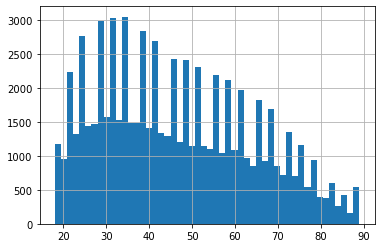

In [5]:
# Age
var = 'age'
print(df[var].describe(),'\n') # 72390-71612=769 missing values
print(df[var].unique(),'\n') # missing values are already in nan format
df[var].hist(bins=50) # Initial histogram, odd spikes may be due to how survey was previously administered

In [6]:
df[var+'_NA'] = df[var].isnull() # makes variable with 1 to indicate missing and 0 to indicate present
print('Total Missings: \n', sum(df[var+'_NA']),'\n') # says 769 are missing, matches expected
# the data us clean already

Total Missings: 
 769 



count    72390.000000
mean      1997.715541
std         15.109995
min       1972.000000
25%       1985.000000
50%       1998.000000
75%       2010.000000
max       2022.000000
Name: year, dtype: float64 



<AxesSubplot:>

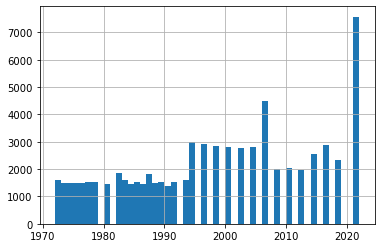

In [18]:
# Year
var = 'year'
print(df[var].describe(),'\n') # 72390-72390=0 missing values
df[var].hist(bins=50) # Initial histogram, looks like some years are missing

count                 72354
unique                    8
top       working full time
freq                  35267
Name: wrkstat, dtype: object 

['working full time' 'retired' 'working part time' 'keeping house'
 'in school' 'unemployed, laid off, looking for work'
 'with a job, but not at work because of temporary illness, vacation, strike'
 'other' nan] 

working full time                                                             35267
retired                                                                       10886
keeping house                                                                 10764
working part time                                                              7430
unemployed, laid off, looking for work                                         2621
in school                                                                      2187
other                                                                          1643
with a job, but not at work because of temporary illne

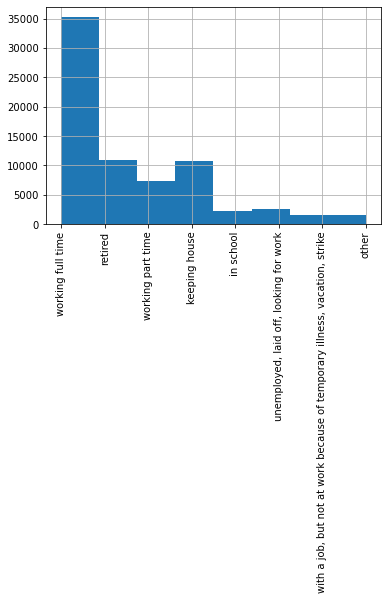

In [27]:
# Work status
var = 'wrkstat'
print(df[var].describe(),'\n') # 72390-72354=36 missing values expected
print(df[var].unique(),'\n') # 8 categories not including nan, keeping "other"
print(df[var].value_counts(), '\n')
print(df[var].hist(bins=8), '\n')
plt.xticks(rotation=90)
df[var+'_NA'] = df[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(df[var+'_NA']),'\n') # 36 missing values, already in nan form

count               42333
unique                 12
top       $25,000 or more
freq                18249
Name: income, dtype: object 

[nan '$1,000 to $2,999' '$15,000 to $19,999' '$7,000 to $7,999'
 '$8,000 to $9,999' '$20,000 to $24,999' '$4,000 to $4,999'
 '$10,000 to $14,999' '$25,000 or more' '$3,000 to $3,999' 'under $1,000'
 '$5,000 to $5,999' '$6,000 to $6,999'] 



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

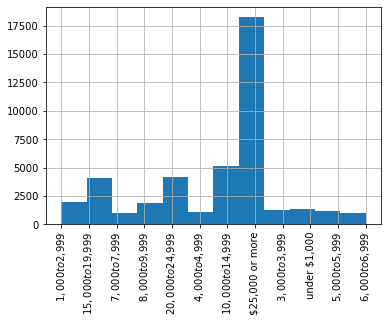

In [31]:
# Income
df = df.rename(columns = {'rincome': 'income'}) # change respondent income, "rincome," to "income"
var = 'income'
print(df[var].describe(),'\n') # 72390-42333=30057 missing values
print(df[var].unique(),'\n') # missing values are already in nan format, need to get rid of dollar signs and commas
df[var].hist(bins=12) # odd spikes may be due to how survey previously pooled ages (Methodological 56)
plt.xticks(rotation=90)